In [1]:
from shapely.geometry import Polygon

polygon1 = Polygon([(30,10),(40,40),(20,35),(10,20),(30,10)])

print(f"Polygon area: {polygon1.area}, polygon length: {polygon1.length}")

Polygon area: 475.0, polygon length: 92.62674088208993


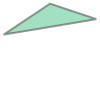

In [3]:
polygon2 = Polygon([(20,20),(80,30),(50,40),(20,20)])
polygon2

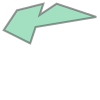

In [6]:
polygon2.union(polygon1)

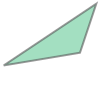

In [7]:
polygon2.intersection(polygon1)

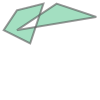

In [9]:
polygon2.symmetric_difference(polygon1)

In [11]:
result = polygon2.symmetric_difference(polygon1)
print(f"Polygon area: {result.area}, polygon length: {result.length}")

Polygon area: 803.9915966386554, polygon length: 221.13265554139582


In [12]:
result.wkt

'MULTIPOLYGON (((20 20, 34.11764705882353 22.35294117647059, 30 10, 10 20, 20 35, 40 40, 37.14285714285715 31.42857142857143, 20 20)), ((37.14285714285715 31.42857142857143, 50 40, 80 30, 34.11764705882353 22.35294117647059, 37.14285714285715 31.42857142857143)))'

In [ ]:
import shapely.wkt

s = result.wkt
type(s)
mypolygon = shapely.wkt.loads(s)
mypolygon

In [16]:
polygon1.intersects(polygon2)

True

In [17]:
polygon1.within(polygon2)

False

In [19]:
polygon1.equals(polygon2)

False

In [20]:
from shapely.geometry import shape
from shapely.geometry import MultiPolygon
uk = MultiPolygon(shape(geometry))
uk

NameError: name 'geometry' is not defined

In [21]:
import rasterio

dataset = rasterio.open('data/test.jpg','r')


/root/miniconda3/lib/python3.7/site-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [23]:
import folium

map_osm = folium.Map(location=[55.946167,-3.209626],zoom_start=17)
map_osm

In [44]:
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import LineString
poly1 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
print(poly1.length,poly1.area,poly1.bounds)

4.0 1.0 (0.0, 0.0, 1.0, 1.0)


In [46]:
Point(0, 0).geom_type

'Point'

In [48]:
Point(0, 0).distance(Point(2,3))

3.605551275463989

In [3]:
from shapely.geometry import LineString
from shapely.geometry import Point
line = LineString([(2, 0), (2, 4), (3, 4)])
point = Point(1, 1)
point.hausdorff_distance(line)

3.605551275463989

In [55]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut.centroid.wkt
donut.representative_point().wkt

'POINT (-1.5 4.119267568565299e-15)'

In [56]:
Point(0, 0).buffer(2.0).geom_type

'Polygon'

In [57]:
point = Point(0.0, 0.0)

In [58]:
point.length

0.0

In [59]:
list(point.coords)

[(0.0, 0.0)]

In [60]:
point.x

0.0

In [65]:
point.coords[:]

[(0.0, 0.0)]

In [4]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1)])
line.area


0.0

In [67]:
line.length

1.4142135623730951

In [69]:
len(line.coords)
list(line.coords)

[(0.0, 0.0), (1.0, 1.0)]

In [71]:
line.coords[1:]

[(1.0, 1.0)]

In [6]:
line.is_valid

True

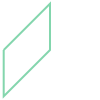

In [6]:
from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0, 0), (1, 1), (1, 0),(0,-1)])
ring

In [16]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
print(polygon.area)
print(polygon.bounds)
print(list(polygon.exterior.coords))
print(list(polygon.interiors))

0.5
(0.0, 0.0, 1.0, 1.0)
[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
[]


0.5
6.5507620529190325


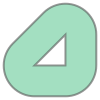

In [21]:
coords = [(0, 0), (1, 1), (1, 0)]
r = LinearRing(coords)
s = Polygon(r)
print(s.area)
t = Polygon(s.buffer(1.0).exterior,[r])
print(t.area)
t

In [27]:
from shapely.geometry import box
b = box(0.0,0.0,1.0,1.0)
print(b.exterior.coords[:])
list(b.exterior.coords)

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]


[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

In [32]:
from shapely.geometry import LineString
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
x = a.intersection(b)
x
from pprint import pprint
pprint(list(x))

In [38]:
ip = LineString([(0, 0), (0, 1), (1, 1)]).interpolate(1.5)
pprint(ip.coords[:])
ip.wkt

[(0.5, 1.0)]


'POINT (0.5 1)'

In [39]:
LineString([(0, 0), (0, 1), (1, 1)]).interpolate(0.75, normalized=True).wkt

'POINT (0.5 1)'

In [40]:
LineString([(0, 0), (0, 1), (1, 1)]).project(ip)

1.5

In [44]:
from shapely.geometry import Point
def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]
        
line = LineString([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)])
pprint([list(x.coords) for x in cut(line, 1.0)])
pprint([list(x.coords) for x in cut(line, 2.5)])

[[(0.0, 0.0), (1.0, 0.0)],
 [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]
[[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (2.5, 0.0)],
 [(2.5, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]


In [45]:
LinearRing([(1,0), (1,1), (0,0)]).is_ccw

True

In [46]:
ring = LinearRing([(0,0), (1,1), (1,0)])
ring.is_ccw
ring.coords = list(ring.coords)[::-1]
ring.is_ccw

True

In [47]:
>>> a = LineString([(0, 0), (1, 1)])
>>> b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
>>> c = LineString([(0, 0), (0, 0), (1, 1)])
>>> a.equals(b)

True

In [48]:
>>> a == b

False

In [49]:
>>> b.equals(c)

True

In [50]:
>>> b == c

False

In [51]:
coords = [(0, 0), (1, 1)]
LineString(coords).contains(Point(0.5, 0.5))

True

In [52]:
Point(0.5, 0.5).within(LineString(coords))

True

In [53]:
LineString(coords).contains(Point(1.0, 1.0))

False

In [58]:
>>> line = LineString(coords)
>>> contained = filter(line.contains, [Point(), Point(0.5, 0.5)])
>>> [p.wkt for p in contained]

['POINT (0.5 0.5)']

In [61]:
coords = [(0, 0), (1, 1)]
LineString(coords).crosses(LineString([(0, 1), (1, 0)]))

True

In [62]:
LineString(coords).crosses(Point(0.5, 0.5))

False

In [63]:
Point(0, 0).disjoint(Point(1, 1))

True

In [65]:
print(LineString(coords).contains(Point(1.0, 1.0)))
print(LineString(coords).intersects(Point(1.0, 1.0)))

False
True


In [79]:
from shapely.geometry import MultiLineString
coords = [((0,0),(1,1)),((-1,0),(1,0))]
lines = MultiLineString(coords)
pprint(list(lines.boundary))
lines.boundary.boundary.is_empty

True

In [85]:
LineString([(0, 0), (1, 1)]).centroid.coords[:]

[(0.5, 0.5)]

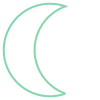

In [92]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.difference(b).boundary

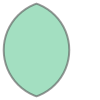

In [93]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.intersection(b)

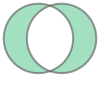

In [94]:
a.symmetric_difference(b)

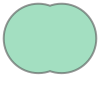

In [95]:
a.union(b)

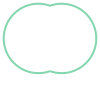

In [96]:
a.union(b).boundary

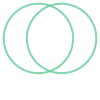

In [97]:
 a.boundary.union(b.boundary)

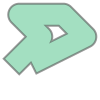

In [120]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
dilated = line.buffer(0.5,resolution=16,cap_style=3,join_style=1)
dilated

In [132]:
p = Point(0, 0).buffer(10.0, 16)
len(p.exterior.coords)

66

In [145]:
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
bowtie = Polygon(coords)
clean = bowtie.buffer(0)
pprint(clean)

In [144]:
list(clean[1].exterior.coords)

[(1.0, 1.0), (2.0, 2.0), (2.0, 0.0), (1.0, 1.0)]

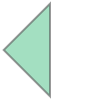

In [148]:
from shapely.geometry import MultiPoint
MultiPoint([(0, 0), (1, 1), (1, -1)]).convex_hull

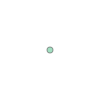

In [149]:
Point(0, 0).envelope

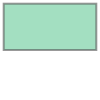

In [151]:
MultiPoint([(0, 0), (2, 1)]).envelope

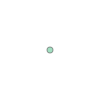

In [152]:
Point(0, 0).minimum_rotated_rectangle

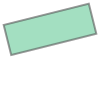

In [153]:
MultiPoint([(0,0),(1,1),(2,0.5)]).minimum_rotated_rectangle

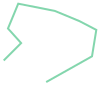

In [181]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line.parallel_offset(0.5,'left',resolution=16,join_style=2,mitre_limit=0.01)

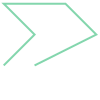

In [159]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line

3.1365484905459384


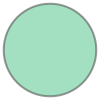

In [192]:
p = Point(0.0, 0.0)
x = p.buffer(1.0)
print(x.area)
x

3.1214451522580524


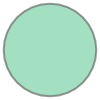

In [191]:
s = x.simplify(0.01, preserve_topology=False)
print(s.area)
s

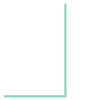

In [194]:
from shapely import affinity
line = LineString([(1, 3), (1, 1), (4, 1)])
rotated_a = affinity.rotate(line, 90)
rotated_a

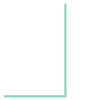

In [195]:
rotated_b = affinity.rotate(line, 90, origin='centroid')
rotated_b

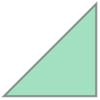

In [214]:
>>> from shapely.ops import polygonize
from shapely.geometry import MultiLineString
>>> lines = [
...     ((0, 0), (1, 1)),
...     ((0, 0), (0, 1)),
...     ((0, 1), (1, 1)),
...     ((1, 1), (1, 0)),
...     ((1, 0), (0, 0))
...     ]
MultiLineString(lines)
pprint(list(polygonize(lines)))
list(polygonize(lines))[0]

[(1.3333333333333333, 2.3333333333333335)]

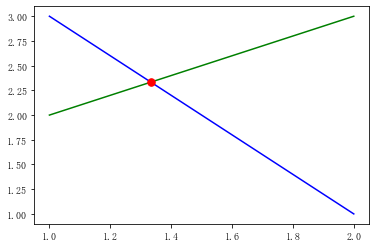

In [260]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np

line1 = LineString([(1,2),(2,3)])
line2 = LineString([(2,1),(1,3)])
inte = line1.intersection(line2)

line1pts = np.asarray(line1)
line2pts = np.asarray(line2)
intepts = np.asarray(inte)

plt.plot(*line1pts, color='green')
plt.plot(*line2pts, color='blue')
plt.plot(*intepts, 'r.',markersize=15)
inte.coords[:]

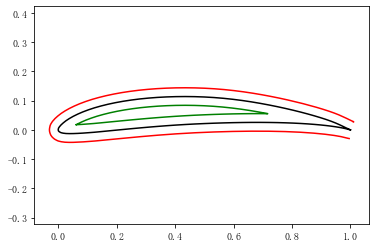

In [262]:
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import requests
import shapely.geometry as shp

# Read the points    
AFURL = 'http://m-selig.ae.illinois.edu/ads/coord_seligFmt/ah79100c.dat'
afpts = np.loadtxt(BytesIO(requests.get(AFURL).content), skiprows=1)

# Create a Polygon from the nx2 array in `afpts`
afpoly = shp.Polygon(afpts)
afpoly1 = shp.LineString(afpts)

# Create offset airfoils, both inward and outward
#poffafpoly = afpoly.buffer(0.03)  # Outward offset
poffafpoly = afpoly1.parallel_offset(0.03)
noffafpoly = afpoly.buffer(-0.03)  # Inward offset

# Turn polygon points into numpy arrays for plotting
afpolypts = np.array(afpoly.exterior)
poffafpolypts = np.array(poffafpoly)
noffafpolypts = np.array(noffafpoly.exterior)

# Plot points
plt.plot(*afpolypts.T, color='black')
plt.plot(*poffafpolypts.T, color='red')
plt.plot(*noffafpolypts.T, color='green')
plt.axis('equal')
plt.show()